# Energy efficiency (From UCI Machine Learning Repository)

The provided dataset looks into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.

## Dataset Information

Energy analysis is performed using 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes.

The dataset consists of 8 attributes and there exists 768 samples.

## Attribute Information

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or outcomes, denoted by y1 and y2).

| Attribute Name | Attribute Description     |
| -------------  |:-----------------         |
| X1             | Relative Compactness      |
| X2             | Surface Area              | 
| X3             | Wall Area                 | 
| X4             | Roof Area                 | 
| X5             | Overall Height            | 
| X6             | Orientation               | 
| X7             | Glazing Area              | 
| X8             | Glazing Area Distribution | 
| y1             | Heating Load              | 
| y2             | Cooling Load              | 


## Objective

The aim is to use the measurements of the aforementioned attributes to predict the heating load (y1) of a given building. This is achieved by building a regression model since y1 is a continuous variable, in addition to a classification model by quantaizing y1

### Source

The dataset was created by Angeliki Xifara (angxifara@gmail.com, Civil/Structural Engineer) and was processed by Athanasios Tsanas (tsanasthanasis@gmail.com, Oxford Centre for Industrial and Applied Mathematics, University of Oxford, UK).



##  Import the important libraries and packages

In [90]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

## Load the dataset

In [91]:
data = pd.read_excel(r'C:\Users\amt\Downloads\ENB2012_data.xlsx')
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


## Discover the dataset to detect missing values and data types

It shows that the dataset has no missing values. The data types need not change for the moment

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
X1    768 non-null float64
X2    768 non-null float64
X3    768 non-null float64
X4    768 non-null float64
X5    768 non-null float64
X6    768 non-null int64
X7    768 non-null float64
X8    768 non-null int64
Y1    768 non-null float64
Y2    768 non-null float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Remove the Y2 column since it will not be used in our analysis

In [93]:
data.drop('Y2', axis=1, inplace = True)
data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84


## Study the statistics of the dataset

It is obvious that the dataset needs to be normalized due to the wide range of values that the attributes have.


In [94]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000


## Study the correlation of the different attributes with the output

Studying the correlation among the different attributes and the target variable 'Y1' helps in identifying the attributes that can be used to build a prediction model. For example, attributes X4 and X5 have strong correlation with Y1, therefore using them in the model construction will improve the error. However, using attribute X6 and X8 which have relatively low correlation with Y1 is less likely to improve the error that much.

In [95]:
data.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,0.000000,1.283986e-17,1.764620e-17,0.622272
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,0.000000,1.318356e-16,-3.558613e-16,-0.658120
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,0.000000,-7.969726e-19,0.000000e+00,0.455671
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,0.000000,-1.381805e-16,-1.079129e-16,-0.861828
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,0.000000,1.861418e-18,0.000000e+00,0.889430
X6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000e+00,-0.002587
X7,1.283986e-17,1.318356e-16,-7.969726e-19,-1.381805e-16,1.861418e-18,0.000000,1.000000e+00,2.129642e-01,0.269842
X8,1.764620e-17,-3.558613e-16,0.000000e+00,-1.079129e-16,0.000000e+00,0.000000,2.129642e-01,1.000000e+00,0.087368
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-0.002587,2.698417e-01,8.736846e-02,1.000000


## Construct multiple regression models and choose the best

In [96]:
# Import the necessary packages
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import jaccard_score

In [97]:
# Randomly Shuffle the dataset 
data = data.sample(frac=1).reset_index(drop=True)

# Select and normalize the features to build the model
Xraw = data[['X1', 'X2', 'X3', 'X4', 'X5', 'X7']]
y = data['Y1']

X = StandardScaler().fit(Xraw).transform(Xraw)

In [98]:
# Split dataset into training, validation and testing subsets
nmeas = len(X)
x_train1 = X[0:int(0.65*nmeas),:]
y_train1 = y[0:int(0.65*nmeas)]
x_valid1 = X[int(0.65*nmeas):int(0.85*nmeas),:]
y_valid1 = y[int(0.65*nmeas):int(0.85*nmeas)]
x_test1 = X[int(0.85*nmeas):nmeas,:]
y_test1 = y[int(0.85*nmeas):nmeas]

print('x training data: ', len(x_train1))
print('y training data: ', len(y_train1))
print('x validation data: ', len(x_valid1))
print('y training data: ', len(y_valid1))
print('x testing data: ', len(x_test1))
print('y testing data: ', len(y_test1))

x training data:  499
y training data:  499
x validation data:  153
y training data:  153
x testing data:  116
y testing data:  116


In [99]:
# Train a regression model for different values of regularization and choose the regularization that minimizes the validation
# error. 
order = np.arange(1,11)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 150, 200]
MSE_valid = np.zeros((len(order),len(alphas)))
#R_sq_valid = np.zeros((len(order),len(alphas)))
for n in order:
    for a in range(0,len(alphas)):
        x_train_poly1 = PolynomialFeatures(n).fit_transform(x_train1)
        x_valid_poly1 = PolynomialFeatures(n).fit_transform(x_valid1)
        model_reg = Ridge(alpha=alphas[a]).fit(x_train_poly1,y_train1)
        y_pred1 = model_reg.predict(x_valid_poly1)
        MSE_valid[n-1,a] = mean_squared_error(y_valid1,y_pred1)
        #R_sq_valid[n-1,a] = r2_score(y_valid1,y_pred1)
    print('MSE using validation dataset of model of order ', n, ': ', MSE_valid[n-1,:])
    #print('R-squared of model of order ', n, ': ', R_sq_valid[n-1,:])


MSE using validation dataset of model of order  1 :  [10.5846062  10.58451527 10.58360942 10.57487889 10.50668389 10.22827085
 10.30590563 10.68639335 11.49196924 12.34256914 13.26158694]
MSE using validation dataset of model of order  2 :  [ 1.12037064  1.20709799  1.32498954  3.28061863  6.6798646   7.74421495
  8.07537481  8.343798    8.84859552  9.51307452 10.32077026]
MSE using validation dataset of model of order  3 :  [0.33218047 0.33294215 0.34395244 0.51336265 1.97569426 5.3480266
 5.99038966 6.39587534 6.97965339 7.47776887 7.92390659]
MSE using validation dataset of model of order  4 :  [0.30886916 0.30899443 0.30906444 0.3231555  0.39713728 1.82138132
 3.49519478 4.84476662 6.03222455 6.70156628 7.21242602]
MSE using validation dataset of model of order  5 :  [0.31653165 0.31644291 0.31616406 0.31744405 0.35539137 0.96620084
 2.0670227  3.32602791 4.62480344 5.30389075 5.75439584]
MSE using validation dataset of model of order  6 :  [0.31695853 0.31692312 0.31663006 0.31551

In [100]:
# Repeat the same process for different regression models of different orders, and choose the model that minimizes the
# testing error
chosen_alpha = []
MSE_test = np.zeros((len(order),1))
#R_sq_test = np.zeros((len(order),1))
for n in order:
    x_test_poly1 = PolynomialFeatures(n).fit_transform(x_test1)
    chosen_alpha.append(np.argmin(MSE_valid[n-1,:]))
    model_reg = Ridge(alpha=alphas[chosen_alpha[n-1]]).fit(x_test_poly1,y_test1)
    y_pred1 = model_reg.predict(x_test_poly1)
    MSE_test[n-1] = mean_squared_error(y_test1,y_pred1)
    #R_sq_test[n-1] = r2_score(y_test1,y_pred1)
    print('MSE using testing dataset of model of order ', n, ': ', MSE_test[n-1])
    #print('R-squared using testing dataset of model of order ', n, ': ', R_sq_test[n-1])
print('\nRegularization: ', chosen_alpha)

MSE using testing dataset of model of order  1 :  [12.20693571]
MSE using testing dataset of model of order  2 :  [1.25084704]
MSE using testing dataset of model of order  3 :  [0.15597385]
MSE using testing dataset of model of order  4 :  [0.13828104]
MSE using testing dataset of model of order  5 :  [0.1364591]
MSE using testing dataset of model of order  6 :  [0.13630657]
MSE using testing dataset of model of order  7 :  [0.1358567]
MSE using testing dataset of model of order  8 :  [0.13573733]
MSE using testing dataset of model of order  9 :  [0.13568026]
MSE using testing dataset of model of order  10 :  [0.13565139]

Regularization:  [5, 0, 0, 0, 2, 3, 3, 3, 3, 3]


Text(0.5, 0, 'Polynomial Order')

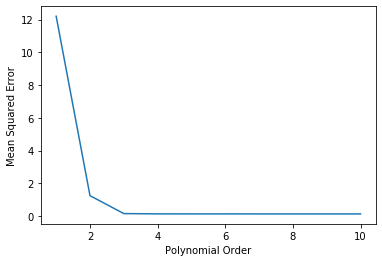

In [101]:
# Plot the MSE and R-squared to choose the best order of polynomial
#fig, axes = plt.subplots(1, 1, figsize=(10,5))
#axes[0].plot(order,R_sq_test)
#axes[0].set_ylabel('R-squared score')
#axes[0].set_xlabel('Polynomial Order')

plt.plot(order,MSE_test)
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Order')

The model that minimizes the testing MSE is the one with polynomial order 6 with regularization alpha=0.01

Check the effect of adding the attribute 'X8' that had low correlation with 'Y1' on MSE but still higher than the attribute 'X6'

In [102]:
# Select and normalize the features to build the model
Xraw = data.drop(['X6','Y1'], axis=1)
y = data['Y1']

X = StandardScaler().fit(Xraw).transform(Xraw)

# Split dataset into training, validation and testing subsets
nmeas = len(X)
x_train1 = X[0:int(0.65*nmeas),:]
y_train1 = y[0:int(0.65*nmeas)]
x_valid1 = X[int(0.65*nmeas):int(0.85*nmeas),:]
y_valid1 = y[int(0.65*nmeas):int(0.85*nmeas)]
x_test1 = X[int(0.85*nmeas):nmeas,:]
y_test1 = y[int(0.85*nmeas):nmeas]


# Train a regression model for different values of regularization and choose the regularization that minimizes the validation
# error. 
order = np.arange(1,11)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 150, 200]
MSE_valid = np.zeros((len(order),len(alphas)))
#R_sq_valid = np.zeros((len(order),len(alphas)))
for n in order:
    for a in range(0,len(alphas)):
        x_train_poly1 = PolynomialFeatures(n).fit_transform(x_train1)
        x_valid_poly1 = PolynomialFeatures(n).fit_transform(x_valid1)
        model_reg = Ridge(alpha=alphas[a]).fit(x_train_poly1,y_train1)
        y_pred1 = model_reg.predict(x_valid_poly1)
        MSE_valid[n-1,a] = mean_squared_error(y_valid1,y_pred1)
        #R_sq_valid[n-1,a] = r2_score(y_valid1,y_pred1)
    print('MSE using validation dataset of model of order ', n, ': ', MSE_valid[n-1,:])
    #print('R-squared of model of order ', n, ': ', R_sq_valid[n-1,:])
    

MSE using validation dataset of model of order  1 :  [10.68234224 10.68225942 10.6814348  10.67352073 10.61359765 10.39820432
 10.52893427 10.94158882 11.74633025 12.5697729  13.45412978]
MSE using validation dataset of model of order  2 :  [ 0.94526626  1.04119149  1.17469242  3.17977148  6.62309917  7.7379236
  8.10205288  8.39355716  8.89976937  9.53282665 10.29145627]
MSE using validation dataset of model of order  3 :  [0.34950546 0.35007379 0.35884228 0.52130834 1.9783622  5.40836358
 6.12273786 6.60390143 7.26081304 7.78287653 8.2300532 ]
MSE using validation dataset of model of order  4 :  [0.32911565 0.3305238  0.32841723 0.33924383 0.40976885 1.88280286
 3.60474544 5.01620694 6.30348387 7.04034763 7.59409368]
MSE using validation dataset of model of order  5 :  [0.30697668 0.30687418 0.31088201 0.32332931 0.36759296 1.01090754
 2.13433682 3.41954586 4.78580305 5.52640184 6.0234117 ]
MSE using validation dataset of model of order  6 :  [0.33408502 0.333508   0.33414301 0.32800

In [103]:
# Repeat the same process for different regression models of different orders, and choose the model that minimizes the
# testing error
chosen_alpha = []
MSE_test = np.zeros((len(order),1))
#R_sq_test = np.zeros((len(order),1))
for n in order:
    x_test_poly1 = PolynomialFeatures(n).fit_transform(x_test1)
    chosen_alpha.append(np.argmin(MSE_valid[n-1,:]))
    model_reg = Ridge(alpha=alphas[chosen_alpha[n-1]]).fit(x_test_poly1,y_test1)
    y_pred1 = model_reg.predict(x_test_poly1)
    MSE_test[n-1] = mean_squared_error(y_test1,y_pred1)
    #R_sq_test[n-1] = r2_score(y_test1,y_pred1)
    print('MSE using testing dataset of model of order ', n, ': ', MSE_test[n-1])
    #print('R-squared of model of order ', n, ': ', R_sq_test[n-1])
print('\nRegularization index: ', chosen_alpha)

MSE using testing dataset of model of order  1 :  [11.66945333]
MSE using testing dataset of model of order  2 :  [0.93948319]
MSE using testing dataset of model of order  3 :  [0.09238244]
MSE using testing dataset of model of order  4 :  [0.03773165]
MSE using testing dataset of model of order  5 :  [0.02095403]
MSE using testing dataset of model of order  6 :  [0.02151435]
MSE using testing dataset of model of order  7 :  [0.02071592]
MSE using testing dataset of model of order  8 :  [0.02994722]
MSE using testing dataset of model of order  9 :  [0.02640612]
MSE using testing dataset of model of order  10 :  [0.02477857]

Regularization index:  [5, 0, 0, 2, 1, 3, 2, 4, 4, 4]


Text(0.5, 0, 'Polynomial Order')

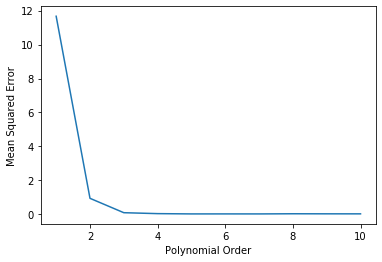

In [104]:
# Plot the MSE and R-squared to choose the best order of polynomial
#fig, axes = plt.subplots(1, 1, figsize=(10,5))
#axes[0].plot(order,R_sq_test)
#axes[0].set_ylabel('R-squared score')
#axes[0].set_xlabel('Polynomial Order')

plt.plot(order,MSE_test)
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Order')

We notice a significant drop in MSE after adding the attribute 'X8', where the best result is obtained when using polynomial of order 7 with regularization alpha=0.01 

So, let us see the effect of adding also the attribute 'X6'

In [105]:
# Select and normalize the features to build the model
Xraw = data.drop(['Y1'], axis=1)
y = data['Y1']

X = StandardScaler().fit(Xraw).transform(Xraw)

# Split dataset into training (65%), validation(20%) and testing(15%) subsets
nmeas = len(X)
x_train1 = X[0:int(0.65*nmeas),:]
y_train1 = y[0:int(0.65*nmeas)]
x_valid1 = X[int(0.65*nmeas):int(0.85*nmeas),:]
y_valid1 = y[int(0.65*nmeas):int(0.85*nmeas)]
x_test1 = X[int(0.85*nmeas):nmeas,:]
y_test1 = y[int(0.85*nmeas):nmeas]


# Train a regression model for different values of regularization and choose the regularization that minimizes the validation
# error. 
order = np.arange(1,11)
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 25, 50, 100, 150, 200]
MSE_valid = np.zeros((len(order),len(alphas)))
#R_sq_valid = np.zeros((len(order),len(alphas)))
for n in order:
    for a in range(0,len(alphas)):
        x_train_poly1 = PolynomialFeatures(n).fit_transform(x_train1)
        x_valid_poly1 = PolynomialFeatures(n).fit_transform(x_valid1)
        model_reg = Ridge(alpha=alphas[a]).fit(x_train_poly1,y_train1)
        y_pred1 = model_reg.predict(x_valid_poly1)
        MSE_valid[n-1,a] = mean_squared_error(y_valid1,y_pred1)
        #R_sq_valid[n-1,a] = r2_score(y_valid1,y_pred1)
    print('MSE using validation dataset of model of order ', n, ': ', MSE_valid[n-1,:])
    #print('R-squared of model of order ', n, ': ', R_sq_valid[n-1,:])

MSE using validation dataset of model of order  1 :  [10.68816689 10.6880807  10.68722278 10.67901344 10.61838668 10.41894016
 10.56829022 10.99494911 11.80620891 12.62814965 13.5090209 ]
MSE using validation dataset of model of order  2 :  [ 0.95976409  1.05794198  1.19921494  3.26922384  6.7712825   7.9363177
  8.31288575  8.5901185   9.05846222  9.66325521 10.40281776]
MSE using validation dataset of model of order  3 :  [0.32830039 0.32933977 0.34201695 0.54519555 2.31838649 6.07052095
 6.79031547 7.26041491 7.86192971 8.32096289 8.71191282]
MSE using validation dataset of model of order  4 :  [0.28783854 0.28919745 0.28497381 0.29803605 0.40423515 2.38309629
 4.41679556 5.97368464 7.31422541 8.0270024  8.52833123]
MSE using validation dataset of model of order  5 :  [0.40361045 0.39945569 0.37770618 0.36467371 0.40708497 1.47258383
 3.05691214 4.59556698 6.08082983 6.85402016 7.36372342]
MSE using validation dataset of model of order  6 :  [68.41189712 12.93418643  1.88316276  0.9

In [106]:
# Repeat the same process for different regression models of different orders, and choose the model that minimizes the
# testing error
chosen_alpha = []
MSE_test = np.zeros((len(order),1))
#R_sq_test = np.zeros((len(order),1))
for n in order:
    x_test_poly1 = PolynomialFeatures(n).fit_transform(x_test1)
    chosen_alpha.append(np.argmin(MSE_valid[n-1,:]))
    model_reg = Ridge(alpha=alphas[chosen_alpha[n-1]]).fit(x_test_poly1,y_test1)
    y_pred1 = model_reg.predict(x_test_poly1)
    MSE_test[n-1] = mean_squared_error(y_test1,y_pred1)
    #R_sq_test[n-1] = r2_score(y_test1,y_pred1)
    print('MSE using testing dataset of model of order ', n, ': ', MSE_test[n-1])
    #print('R-squared of model of order ', n, ': ', R_sq_test[n-1])
print('\nRegularization index: ', chosen_alpha)

MSE using testing dataset of model of order  1 :  [11.43236574]
MSE using testing dataset of model of order  2 :  [0.86608574]
MSE using testing dataset of model of order  3 :  [0.03855985]
MSE using testing dataset of model of order  4 :  [0.00125492]
MSE using testing dataset of model of order  5 :  [0.00029704]
MSE using testing dataset of model of order  6 :  [0.00496122]
MSE using testing dataset of model of order  7 :  [0.3531342]
MSE using testing dataset of model of order  8 :  [1.56696396]
MSE using testing dataset of model of order  9 :  [1.50119685]
MSE using testing dataset of model of order  10 :  [1.21666361]

Regularization index:  [5, 0, 0, 2, 3, 4, 6, 9, 10, 10]


Text(0.5, 0, 'Polynomial Order')

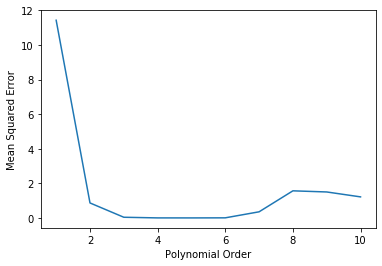

In [107]:
# Plot the MSE and R-squared to choose the best order of polynomial
#fig, axes = plt.subplots(1, 1, figsize=(10,5))
#axes[0].plot(order,R_sq_test)
#axes[0].set_ylabel('R-squared score')
#axes[0].set_xlabel('Polynomial Order')

plt.plot(order,MSE_test)
plt.ylabel('Mean Squared Error')
plt.xlabel('Polynomial Order')

We notice a further drop in the MSE when using all available attributes to build the regression model. The best result is obtained for a polynomial of order 5 with regularization alpha = 0.1

## Construct a classification model using Logistic Regression and Decision Trees

Divide the heating load measurments from having continuous values to 'Low', 'Medium' or 'High' heating load as follows:

| Heating Load | Class     |
| -------------  |:-----------------         |
| Less than or equal to 15             | Low      |
| Between 15 and 30      | Medium              | 
| Higher than or equal to 30 | High           | 


In [126]:
# Add a column to the dataset that divides the column 'Y1' into distinct classes
data['Y1_cat'] = pd.cut(data['Y1'],bins = [0,15,30,50], labels=['Low', 'Medium', 'High'])
data['Y1_cat'] = data['Y1_cat'].astype(str)

In [127]:
data['Y1_cat'].value_counts()

Low       285
Medium    282
High      201
Name: Y1_cat, dtype: int64

### Logistic Regression

Jaccard Score using validation dataset:  [0.7172027203316315, 0.7394136248954772, 0.7498877920049111, 0.7498877920049111, 0.7698347682077343, 0.7698347682077343, 0.770564457785741, 0.770564457785741, 0.7608805831150687, 0.770564457785741, 0.7803647942911005, 0.7803647942911005, 0.7803647942911005, 0.7803647942911005, 0.7803647942911005, 0.7803647942911005, 0.7803647942911005, 0.7902869677927484, 0.7902869677927484, 0.7902869677927484, 0.7902869677927484, 0.7902869677927484, 0.7902869677927484, 0.8010722952762572, 0.8010722952762572, 0.8010722952762572, 0.8010722952762572, 0.8010722952762572, 0.8010722952762572, 0.8010722952762572]


Text(0, 0.5, 'Jaccard Score')

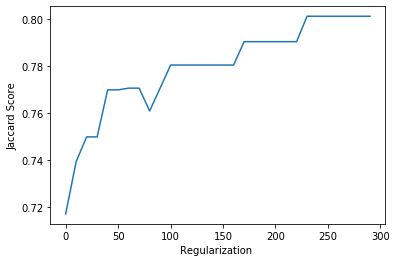

In [128]:
# Split dataset into training and testing subsets. Use all attributes as we now know that they improved the testing error
# when using regression
Xraw2 = data.drop(['Y1', 'Y1_cat'], axis=1)
X2 = StandardScaler().fit(Xraw2).transform(Xraw2)
y2 = data['Y1_cat']

# Split dataset into training, validation and testing subsets
nmeas = len(X2)
x_train3 = X2[0:int(0.65*nmeas),:]
y_train3 = y2[0:int(0.65*nmeas)]
x_valid3 = X2[int(0.65*nmeas):int(0.85*nmeas),:]
y_valid3 = y2[int(0.65*nmeas):int(0.85*nmeas)]
x_test3 = X2[int(0.85*nmeas):nmeas,:]
y_test3 = y2[int(0.85*nmeas):nmeas]

# Construct the model
jacc = []
Cs = np.arange(0.1,300,10)
for n in Cs:
    model_logreg = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial', C=n).fit(x_train3,y_train3)
    y_pred3 = model_logreg.predict(x_valid3)
    jacc.append(jaccard_score(y_valid3,y_pred3, average='weighted'))
print('Jaccard Score using validation dataset: ', jacc)
plt.plot(Cs, jacc)
plt.xlabel('Regularization ')
plt.ylabel('Jaccard Score')


Based on the Jaccard scores, using C = 230 is a good choice

In [129]:
# Construct a model that corresponds to the regularization that maximizes the jaccard's score and calculate the jaccard score
# using the testing dataset

model_logreg = LogisticRegression(random_state=0, solver='newton-cg', multi_class='multinomial', C=230).fit(x_train3,y_train3)

print('\nJaccard Score using testing dataset: ', jaccard_score(y_test3,model_logreg.predict(x_test3), average='weighted'))


Jaccard Score using testing dataset:  0.6677385490815962


### Decsion Trees

Jaccard Score using validation dataset:  [0.40349359038860155, 0.6846277280414668, 0.7674614305750351, 0.9250876890345583, 0.8665150198010239, 0.9743192574835577, 0.9743230625583565, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163, 0.9870469399881163]


Text(0, 0.5, 'Jaccard Score')

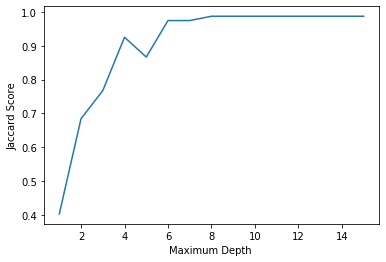

In [130]:
# Construct different models using decision trees of different depths

max_dep = np.arange(1,16)
jacc = []
for n in max_dep:
    model_tree = DecisionTreeClassifier(random_state =0, max_depth=n).fit(x_train3,y_train3)
    y_pred4 = model_tree.predict(x_valid3)
    jacc.append(jaccard_score(y_valid3,y_pred4, average='weighted'))
    
print('Jaccard Score using validation dataset: ', jacc)
plt.plot(max_dep, jacc)
plt.xlabel('Maximum Depth ')
plt.ylabel('Jaccard Score')

Based on the Jaccard scores, using maximum depth of 8 is a good choice

In [131]:
# Re-construct a decision tree using maximum depth of 8 and compute the jaccard score using the testing dataset to compare it
# with the one obtained using logistic regression


model_tree = DecisionTreeClassifier(random_state =0, max_depth=8).fit(x_train3,y_train3)
y_pred4 = model_tree.predict(x_test3)
    
print('Jaccard Score using testing dataset: ', jaccard_score(y_test3,y_pred4, average='weighted'))


Jaccard Score using testing dataset:  0.9830901856763926


### Using a decision tree of depth 8 gives a much better jaccard similarity score; computed using testing dataset, than using logistic regression model with C=230